# FONTES ENERGÉTICAS

## Estudando os dados do arquivo

### Importando bibliotecas

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importando csv

In [8]:
fe = pd.read_csv('relatorio.csv', sep=';', encoding='utf-8')
fe.head(3)

,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Tipo de Fonte Energética,Quantidade Consumida,Unidade de Medida,Observações,Energia,Emissões de CO2,Situação Cadastral
0,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2012,Gás Natural (Seco),"1920000,00",t/m³,A quantidade de gás natural utilizada como mat...,"52,34","2921,72",Ativa
1,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2013,Eletricidade - Rede Pública,"232,85",MWh,"Se possível, informe a quantidade de energia c...","0,84","0,00",Ativa
2,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2014,Eletricidade - Rede Pública,"314,79",MWh,"Se possível, informe a quantidade de energia c...","1,13","0,00",Ativa


In [9]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212029 entries, 0 to 212028
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CNPJ                      212029 non-null  object
 1   Razão Social              212029 non-null  object
 2   Estado                    212029 non-null  object
 3   Município                 212029 non-null  object
 4   Código da Categoria       212029 non-null  int64 
 5   Categoria de Atividade    212029 non-null  object
 6   Código do Detalhe         212029 non-null  int64 
 7   Detalhe                   212029 non-null  object
 8   Ano                       212029 non-null  int64 
 9   Tipo de Fonte Energética  212029 non-null  object
 10  Quantidade Consumida      212029 non-null  object
 11  Unidade de Medida         212029 non-null  object
 12  Observações               186019 non-null  object
 13  Energia                   212029 non-null  object
 14  Emis

### Troca de object para float
Nota-se que os valores de Consumo, Energia e Emissão estão em str

In [10]:
fe.columns[14]

'Emissões de CO2 '

Tem um espaço depois do CO2, por isso que deu erro tentando transformar em float

#### Ao tentar fazer a tranformação dava erro nos números por causa da vírgula

In [11]:
fe['Quantidade Consumida'] = fe['Quantidade Consumida'].astype(float)
fe['Energia'] = fe['Energia'].astype(float)
[fe.columns[14]] = fe[fe.columns[14]].astype(float)

ValueError: could not convert string to float: '1920000,00'

#### Está dando erro provavelmente porque possui pontos nos números

Primeiro retirar o '.' (fiz isso pelo excel, pois não consegui pelo python) e depois substituir a ',' pelo '.'

In [12]:
#TESTES TENTANDO RETIRAR O PONTO DAS STRINGS
#fe['Energia'] = fe['Energia'].replace('.','', regex=True).replace(',','.', regex=True)
#fe['Energia'].stack().str.replace('.','').unstack()
#fe['Energia'] = fe['Energia'].apply(lambda x: locale.currency(x))
#fe['Energia'] = fe['Energia'].apply(lambda x: x.replace(',', '', inplace=True)

fe['Energia'].replace(to_replace=',', value='.', regex=True, inplace=True)
fe['Quantidade Consumida'].replace(to_replace=',', value='.', regex=True, inplace=True)
fe['Emissões de CO2 '].replace(to_replace=',', value='.', regex=True, inplace=True)

In [13]:
fe.head()

,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Tipo de Fonte Energética,Quantidade Consumida,Unidade de Medida,Observações,Energia,Emissões de CO2,Situação Cadastral
0,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2012,Gás Natural (Seco),1920000.00,t/m³,A quantidade de gás natural utilizada como mat...,52.34,2921.72,Ativa
1,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2013,Eletricidade - Rede Pública,232.85,MWh,"Se possível, informe a quantidade de energia c...",0.84,0.00,Ativa
2,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2014,Eletricidade - Rede Pública,314.79,MWh,"Se possível, informe a quantidade de energia c...",1.13,0.00,Ativa
3,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2015,Eletricidade - Rede Pública,241.43,MWh,"Se possível, informe a quantidade de energia c...",0.87,0.00,Ativa
4,00.001.392/0001-03,COVOLAN BENEFICIAMENTOS TEXTEIS LTDA,SAO PAULO,SANTA BARBARA D'OESTE,11,"Indústria Têxtil, de Vestuário, Calçados e Art...",3,"Tingimento, estamparia e outros acabamentos em...",2016,Eletricidade - Rede Pública,223.42,MWh,"Se possível, informe a quantidade de energia c...",0.80,0.00,Ativa


In [14]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212029 entries, 0 to 212028
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CNPJ                      212029 non-null  object
 1   Razão Social              212029 non-null  object
 2   Estado                    212029 non-null  object
 3   Município                 212029 non-null  object
 4   Código da Categoria       212029 non-null  int64 
 5   Categoria de Atividade    212029 non-null  object
 6   Código do Detalhe         212029 non-null  int64 
 7   Detalhe                   212029 non-null  object
 8   Ano                       212029 non-null  int64 
 9   Tipo de Fonte Energética  212029 non-null  object
 10  Quantidade Consumida      212029 non-null  object
 11  Unidade de Medida         212029 non-null  object
 12  Observações               186019 non-null  object
 13  Energia                   212029 non-null  object
 14  Emis

#### Ajustando para float

In [15]:
fe['Quantidade Consumida'] = fe['Quantidade Consumida'].astype(float)
fe['Energia'] = fe['Energia'].astype(float)
fe[fe.columns[14]] = fe[fe.columns[14]].astype(float)

In [16]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212029 entries, 0 to 212028
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CNPJ                      212029 non-null  object 
 1   Razão Social              212029 non-null  object 
 2   Estado                    212029 non-null  object 
 3   Município                 212029 non-null  object 
 4   Código da Categoria       212029 non-null  int64  
 5   Categoria de Atividade    212029 non-null  object 
 6   Código do Detalhe         212029 non-null  int64  
 7   Detalhe                   212029 non-null  object 
 8   Ano                       212029 non-null  int64  
 9   Tipo de Fonte Energética  212029 non-null  object 
 10  Quantidade Consumida      212029 non-null  float64
 11  Unidade de Medida         212029 non-null  object 
 12  Observações               186019 non-null  object 
 13  Energia                   212029 non-null  f

### 5 estados que mais possuem informações

In [19]:
fe['Estado'].value_counts().head()

SAO PAULO            55944
MINAS GERAIS         41346
RIO GRANDE DO SUL    24908
SANTA CATARINA       20575
PARANA               14484
Name: Estado, dtype: int64

### 5 municípios que mais possuem informações

In [17]:
fe['Município'].value_counts().head()

SAO PAULO                  4953
CAXIAS DO SUL              4262
RIO DE JANEIRO             2329
CACHOEIRO DE ITAPEMIRIM    2091
MANAUS                     2048
Name: Município, dtype: int64

### 5 categorias de atividade que mais utilizam das fontes energéticas

In [18]:
fe['Categoria de Atividade'].value_counts().head()

Indústria de Produtos Alimentares e Bebidas     41096
Indústria Química                               23757
Indústria de Produtos Minerais Não Metálicos    22271
Indústria Metalúrgica                           18585
Extração e Tratamento de Minerais               15211
Name: Categoria de Atividade, dtype: int64

#### Correlação entre os dados

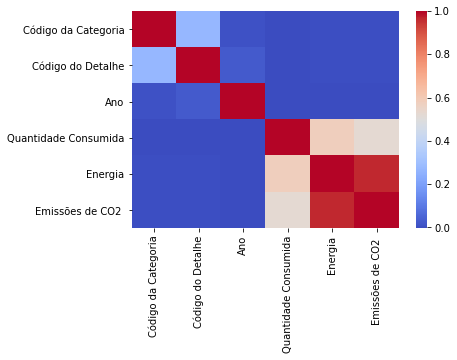

In [20]:
sns.heatmap(fe.corr(), cmap='coolwarm')

Nota-se um relação entre Energia e CO2

In [22]:
fe[['Estado','Código da Categoria']]

,Estado,Código da Categoria
0,SAO PAULO,11
1,SAO PAULO,11
2,SAO PAULO,11
3,SAO PAULO,11
4,SAO PAULO,11
...,...,...
212024,RIO GRANDE DO SUL,7
212025,RIO GRANDE DO SUL,7
212026,RIO GRANDE DO SUL,7
212027,RIO GRANDE DO SUL,7


#### Lista dos valores das colunas

In [36]:
states = list(fe['Estado'].drop_duplicates())
cod_cat = list(fe['Código da Categoria'].drop_duplicates())
situa = list(fe['Situação Cadastral'].drop_duplicates())
medidas = list(fe['Unidade de Medida'].drop_duplicates())

In [37]:
situa

['Ativa',
 'Encerramento de atividades',
 'Cadastramento indevido',
 'Suspenso para Averiguações - dados cadastrais inconsistentes e_ou recadastramento',
 'Suspenso para averiguações']

In [38]:
medidas

['t/m³', 'MWh', 'TON', 't/st', 't/mdc']

#### Estados quantidades de CNPJs por estados

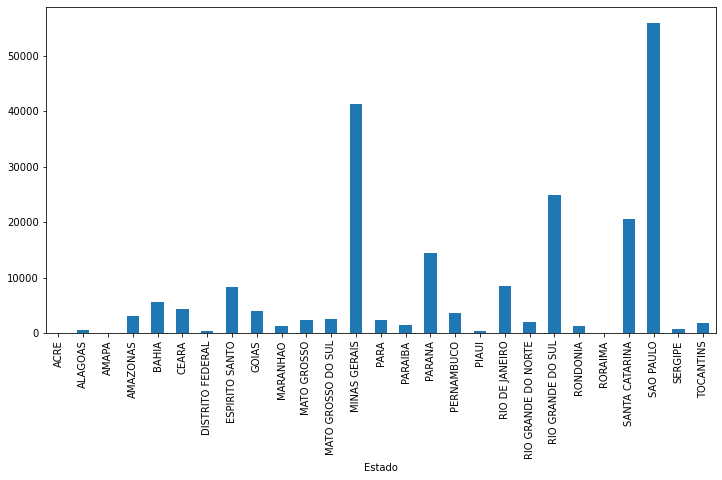

In [46]:
states=fe.groupby('Estado').count()['CNPJ']
states.plot.bar(figsize=(12,6))

Nota-se que os top 5 que mais possuem CNPJ e estão inscritas no Cadastro Técnico Federal de Atividades Potencialmente Poluidoras e Utilizadoras de Recursos Naturais no Brasil são: SP, MG, RS, SC e PR

### Análise dos CNPJs ativos

In [25]:
fe_ativos = fe[fe['Situação Cadastral'] == 'Ativa']

In [39]:
cnpj = fe_ativos.groupby('Ano').count()['CNPJ']
anos = list(fe['Ano'].drop_duplicates())

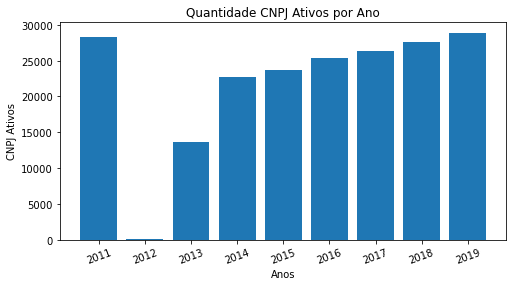

In [45]:
plt.figure(figsize=(8,4))
plt.bar(anos, cnpj)
plt.xticks(anos, rotation = 20)
plt.ylabel('CNPJ Ativos')
plt.xlabel('Anos')
plt.title('Quantidade CNPJ Ativos por Ano')
plt.show()

### Separação das unidades de medida

In [29]:
fe_mwh = fe[fe['Unidade de Medida'] == 'MWh']
fe_ton = fe[fe['Unidade de Medida'] == 'TON']
fe_mdc = fe[fe['Unidade de Medida'] == 't/mdc']
fe_m3 = fe[fe['Unidade de Medida'] == 't/m³']
fe_st = fe[fe['Unidade de Medida'] == 't/st']

#### Conhecendo os tipos de fonte energética em cada unidade de medida

In [123]:
list(fe_mwh['Tipo de Fonte Energética'].drop_duplicates())

['Eletricidade -  Rede Pública',
 'Eletricidade - Autoprodução - Hidrelétrica',
 'Eletricidade - Autoprodução - Termoelétrica',
 'Gás Natural (Seco)',
 'Eletricidade - Autoprodução - Fotovoltaica',
 'Eletricidade - Autoprodução - Eólica',
 'Óleo Combustível',
 'Biomassa - Lenha',
 'Óleo Diesel',
 'Gás Liquefeito de Petróleo (GLP)',
 'Biomassa - Serragem/Resíduos de Madeira']

In [122]:
list(fe_ton['Tipo de Fonte Energética'].drop_duplicates())

['Gás Liquefeito de Petróleo (GLP)',
 'Biomassa - Lenha',
 'Biomassa - Serragem/Resíduos de Madeira',
 'Biomassa - Bagaço de Cana',
 'Alcatrão',
 'Coque de Petróleo',
 'Biomassa - Lixívia',
 'Nafta',
 'Carvão Mineral - Metalúrgico',
 'Biomassa - Lã morta de Algodão',
 'Ceras Parafínicas',
 'Etano',
 'Biomassa - Carvão Vegetal',
 'Gás de Alto-forno',
 'Petróleo Bruto',
 'Gás de Forno de Aciária a Oxigênio',
 'Orimulsão',
 'Coque de Carvão Mineral',
 'Biomassa - Gases de Aterro',
 'Biomassa - Outro Biogás',
 'Óleo Combustível',
 'Turfa',
 'Xisto Betuminoso e Areias Asfálticas',
 'Gás de Refinaria',
 'Carvão Mineral - Vapor',
 'Carvão Mineral - Aglomerados',
 'Óleo de Xisto',
 'Biomassa - Casca de Arroz',
 'Outro Combustível Não-Renovável',
 'Biomassa - Outro Combustível Renovável',
 'Gás Natural Úmido',
 'Gás Natural (Seco)',
 'Líquidos de Gás Natural',
 'Óleo Diesel',
 'Eletricidade -  Rede Pública',
 'Matérias-Primas para Refinaria',
 'Gás Manufaturado',
 'Eletricidade - Autoprodução -

In [125]:
list(fe_mdc['Tipo de Fonte Energética'].drop_duplicates())

['Biomassa - Carvão Vegetal', 'Biomassa - Lenha']

In [124]:
list(fe_m3['Tipo de Fonte Energética'].drop_duplicates())

['Gás Natural (Seco)',
 'Óleo Diesel',
 'Querosene de Aviação',
 'Biomassa - Álcool Etílico Anidro',
 'Biomassa - Biodiesel B100',
 'Gás Natural Úmido',
 'Gasolina',
 'Lubrificantes',
 'Querosene Iluminante',
 'Gás Liquefeito de Petróleo (GLP)',
 'Eletricidade -  Rede Pública',
 'Óleo Combustível',
 'Gasolina de Aviação',
 'Coque de Petróleo',
 'Biomassa - Outro Combustível Renovável',
 'Petróleo Bruto',
 'Nafta',
 'Óleo de Xisto']

In [126]:
list(fe_st['Tipo de Fonte Energética'].drop_duplicates())

['Biomassa - Lenha',
 'Biomassa - Outro Combustível Renovável',
 'Eletricidade -  Rede Pública',
 'Biomassa - Serragem/Resíduos de Madeira',
 'Óleo Diesel']

#### Nota-se que a repetições de entre as unidades de medidas

Seria interessante fazer a conversão de unidades para que se mantenha um padrão
1 std -> 0.00635029 TON
mdc e m³ dependem de mais dados específicos para cada elemento, não podendo fazer a conversão

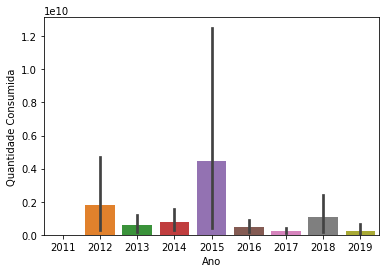

In [131]:
sns.barplot(x='Ano', y='Quantidade Consumida', data=fe_mwh_e)

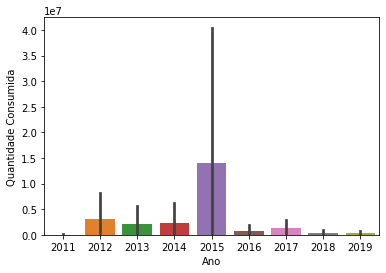

In [130]:
sns.barplot(x='Ano', y='Quantidade Consumida', data=fe_ton)

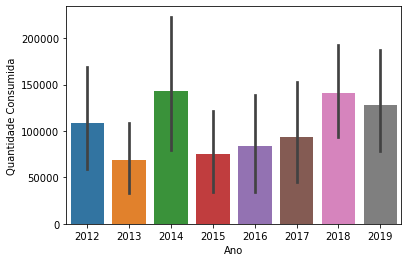

In [129]:
sns.barplot(x='Ano', y='Quantidade Consumida', data=fe_mdc)

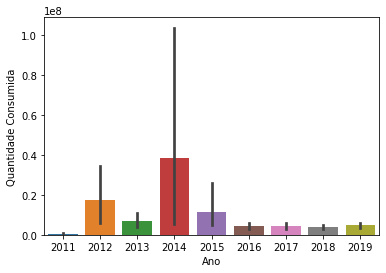

In [128]:
sns.barplot(x='Ano', y='Quantidade Consumida', data=fe_m3)

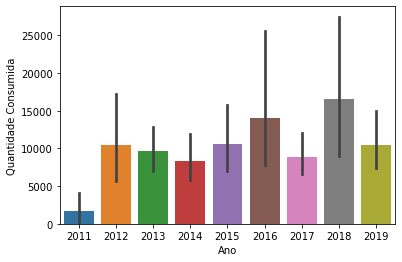

In [127]:
sns.barplot(x='Ano', y='Quantidade Consumida', data=fe_st)

In [167]:
#Analisando apenas o ano de 2015 na unidade de medida TON
fe_m3_2014=fe_ton[fe_ton['Ano']==2014]
cons3=fe_m3_2014['Quantidade Consumida']
tipo3=fe_m3_2014['Tipo de Fonte Energética']

fe_m3_2014.groupby('Tipo de Fonte Energética').sum()['Quantidade Consumida'].sort_values(ascending=False).head(10)

Tipo de Fonte Energética
Biomassa - Outro Biogás                    1.000001e+10
Biomassa - Bagaço de Cana                  3.342047e+09
Biomassa - Serragem/Resíduos de Madeira    1.626075e+08
Gás Natural (Seco)                         1.007084e+08
Biomassa - Lenha                           7.766622e+07
Gás Liquefeito de Petróleo (GLP)           4.681687e+07
Biomassa - Casca de Arroz                  3.459831e+07
Óleo Combustível                           2.637535e+07
Gás de Alto-forno                          2.120267e+07
Gás Natural Úmido                          1.176026e+07
Name: Quantidade Consumida, dtype: float64

In [166]:
#Analisando apenas o ano de 2015 na unidade de medida TON
fe_ton_2015=fe_ton[fe_ton['Ano']==2015]
cons=fe_ton_2015['Quantidade Consumida']
tipo=fe_ton_2015['Tipo de Fonte Energética']

fe_ton_2015.groupby('Tipo de Fonte Energética').sum()['Quantidade Consumida'].sort_values(ascending=False).head(10)

Tipo de Fonte Energética
Óleo Combustível                           8.001133e+10
Gás Liquefeito de Petróleo (GLP)           4.187937e+09
Gás de Alto-forno                          8.183439e+08
Biomassa - Bagaço de Cana                  3.596510e+08
Biomassa - Serragem/Resíduos de Madeira    8.418888e+07
Gás Natural (Seco)                         4.050398e+07
Biomassa - Lenha                           1.684898e+07
Carvão Mineral - Vapor                     1.221766e+07
Gás de Forno de Aciária a Oxigênio         9.173463e+06
Biomassa - Outro Combustível Renovável     8.473786e+06
Name: Quantidade Consumida, dtype: float64

In [165]:
#Analisando apenas o ano de 2015 na unidade de medida MWh
fe_mwh_2015=fe_mwh[fe_mwh['Ano']==2015]
cons2=fe_mwh_2015['Quantidade Consumida']
tipo2=fe_mwh_2015['Tipo de Fonte Energética']

fe_mwh_2015.groupby('Tipo de Fonte Energética').sum()['Quantidade Consumida'].sort_values(ascending=False).head(10)

Tipo de Fonte Energética
Eletricidade -  Rede Pública                   1.182245e+11
Eletricidade - Autoprodução - Termoelétrica    1.159076e+09
Eletricidade - Autoprodução - Hidrelétrica     3.437581e+08
Gás Natural (Seco)                             3.888251e+05
Eletricidade - Autoprodução - Eólica           1.007503e+05
Eletricidade - Autoprodução - Fotovoltaica     4.306010e+04
Biomassa - Lenha                               1.000000e+03
Óleo Diesel                                    2.761300e+02
Gás Liquefeito de Petróleo (GLP)               1.194000e+01
Name: Quantidade Consumida, dtype: float64

### Porquê do grande aumento do consumo de energia por outros meios de geração?
Em 2015 o preço da energia subiu muito, assim, nota-se que as empresas utilizaram meio para gerar energia\
\
https://globoplay.globo.com/v/3890695/ \
\
Jutificativa:
- Nova tarifa no setor energético;
- Hidrelétricas com baixo reservatório de água não sendo possível o uso com grande demanda.

#### Análise apenas com MWh

In [47]:
fe_mwh.groupby(['Estado', 'Ano']).sum().reset_index()

,Estado,Ano,Código da Categoria,Código do Detalhe,Quantidade Consumida,Energia,Emissões de CO2
0,ACRE,2012,16,13,2134664.71,7684792.97,0.0
1,ACRE,2013,16,13,0.22,0.00,0.0
2,ACRE,2014,55,24,1753089.12,1.10,0.0
3,ACRE,2015,40,65,207.41,0.74,0.0
4,ACRE,2016,61,67,4325.37,15.57,0.0
...,...,...,...,...,...,...,...
215,TOCANTINS,2015,1050,971,97992446.58,346550.52,0.0
216,TOCANTINS,2016,931,621,58774981.28,203963.48,0.0
217,TOCANTINS,2017,830,425,63577043.64,228340.54,0.0
218,TOCANTINS,2018,729,411,12071208.17,43379.84,0.0


In [48]:
fe_mwh_e = fe_mwh.groupby(['Estado', 'Ano']).sum().reset_index().drop(columns=['Código da Categoria', 'Código do Detalhe'])

In [50]:
fe_mwh_e

,Estado,Ano,Quantidade Consumida,Energia,Emissões de CO2
0,ACRE,2012,2134664.71,7684792.97,0.0
1,ACRE,2013,0.22,0.00,0.0
2,ACRE,2014,1753089.12,1.10,0.0
3,ACRE,2015,207.41,0.74,0.0
4,ACRE,2016,4325.37,15.57,0.0
...,...,...,...,...,...
215,TOCANTINS,2015,97992446.58,346550.52,0.0
216,TOCANTINS,2016,58774981.28,203963.48,0.0
217,TOCANTINS,2017,63577043.64,228340.54,0.0
218,TOCANTINS,2018,12071208.17,43379.84,0.0


In [81]:
sns.__version__

'0.10.1'

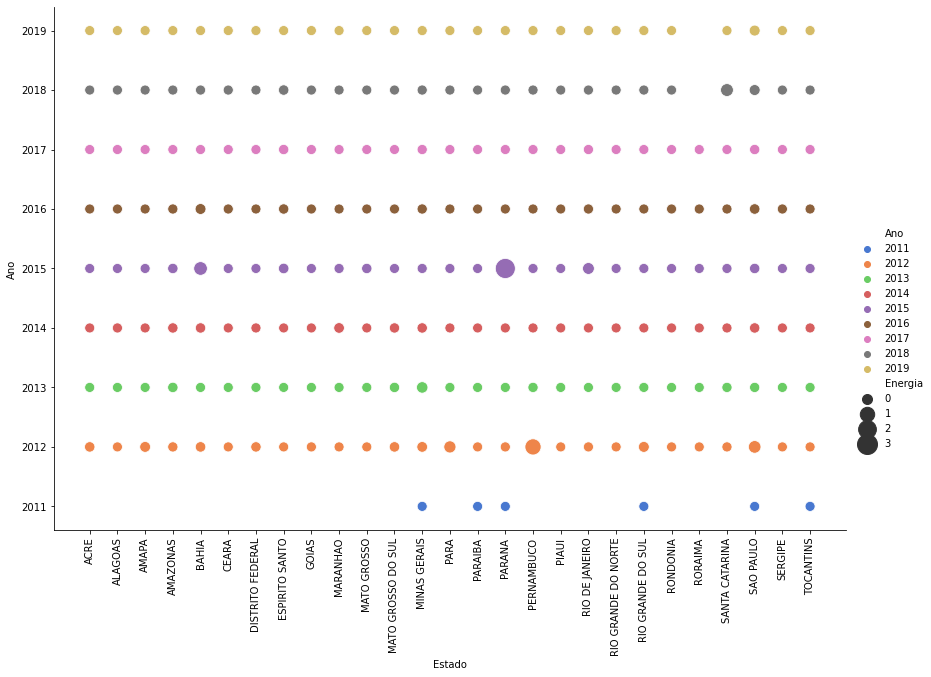

In [53]:
#sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Estado", y="Ano", hue="Ano", size='Energia',
            sizes=(100, 400), alpha=1, palette="muted",
            height=8, aspect=1.5,
            data=fe_mwh_e).set_xticklabels(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text major ticklabel objects>)

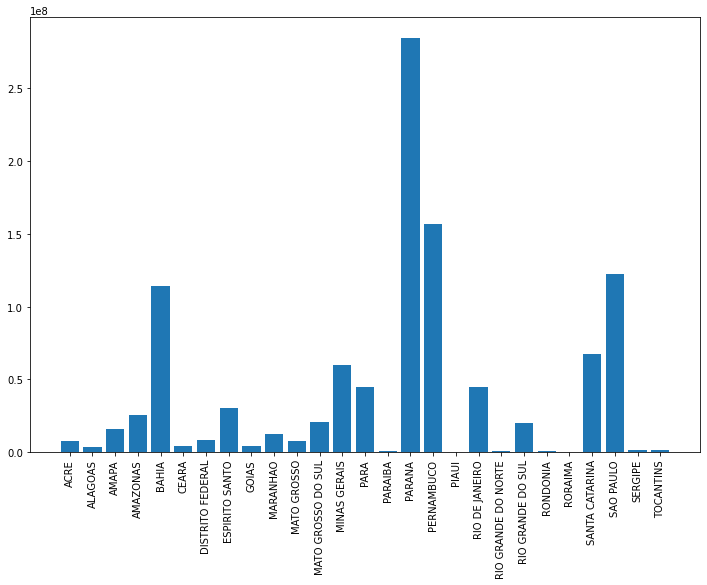

In [83]:
plt.figure(figsize=(12,8))
plt.bar(fe_mwh_e.groupby('Estado').sum().reset_index()['Estado'], fe_mwh_e.groupby('Estado').sum().reset_index()['Energia'])
plt.xticks(rotation='vertical')

In [ ]:
sns.distplot()

####### O QUE DA PRA EXPLORAR COM ESSE ARQUIVO ##### 
- Da pra fazer uma relação de codigos de categoria em relação ao estado
- consumo por estado
- categoria que mais consome energia
- quantidade de empresas inativas por estado e/ou região
- Tipo de Fonte Energética por setor e por estado
- Seria interessante fazer a conversão de unidades para que se mantenha um padrão
1 std -> 0.00635029 TON
mdc e m³ dependem de mais dados específicos para cada elemento, não podendo fazer a conversão
